In [3]:

#Standard Imports 
import numpy as np 
import os
import matplotlib.pyplot as plt 
import pandas as pd
import math
from scipy import integrate

### Jupyter Notebook Setting ###
# Plot all figures in full-size cells, no scroll bards 
%matplotlib inline
#disable Python Warning Output (Note: Only for production, comment out for debugging)
import warnings 
warnings.filterwarnings('ignore')

### Plotting Default BoilerPlate ###
# Set Default Figure Appearance 
import seaborn as sns   #fancy plotting package 
# No Background fill, legend font scale, frame on legend 
sns.set(style='whitegrid',font_scale=1.5, rc={'legend.frameon':True})
# Mark tickd with boarder on all four sides (overrides 'whitegrid')
sns.set_style('ticks')
# ticks point in 
sns.set_style({"xtick.direction": "in", "ytick.direction":"in"})
# fix invisible marker big 
sns.set_context(rc={'lines.marleredgewidth':0.1})
# restore default matplotlib colormap 
mplcolors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf']
sns.set_palette(mplcolors)
# Get Color cycle for manual colors 
colors = sns.color_palette()

# Set Matplotlib Defaults (call after seaborn --> changes some defaults)
params = { 
        # Font Size 
        'axes.labelsize' : 30,
        'axes.titlesize' : 30,
        'font.size'      : 28,
        'xtick.labelsize': 22,
        'ytick.labelsize': 22,
        'legend.fontsize': 24, 
        'font.family'    : 'serif',
        'font.fantasy'   : 'xkcd',
        'font.sans-serif': 'Helvetica',
        'font.monospace' : 'Courier',
        # Axis Props 
        'axes.titlepad'  : 2*6.0,
        'axes.grid'      : True, 
        'figure.figsize' : (8,8),
        'savefig.bbox'   : 'tight',
        # Lengend Props 
        'legend.framealpha'      : 0.5, 
        'legend.fancybox'        : True,
        'legend.frameon'         : True,
        'legend.numpoints'       : 1,
        'legend.scatterpoints'   : 1, 
        'legend.borderpad'       : 0.1, 
        'legend.borderaxespad'   : 0.1,
        'legend.handletextpad'   : 0.2,
        'legend.handlelength'    : 1.0,
        'legend.labelspacing'    : 0,
}
import matplotlib
matplotlib.rcParams.update(params)   #update matplotlib defaults, call after seaborn 

### End of Boilerplate ####

colors = sns.color_palette()

#folder to save results in 
savedir = 'results'
#make save folder 
#os.mkdir(savedir)

# **Landing Gear Placement Analysis**



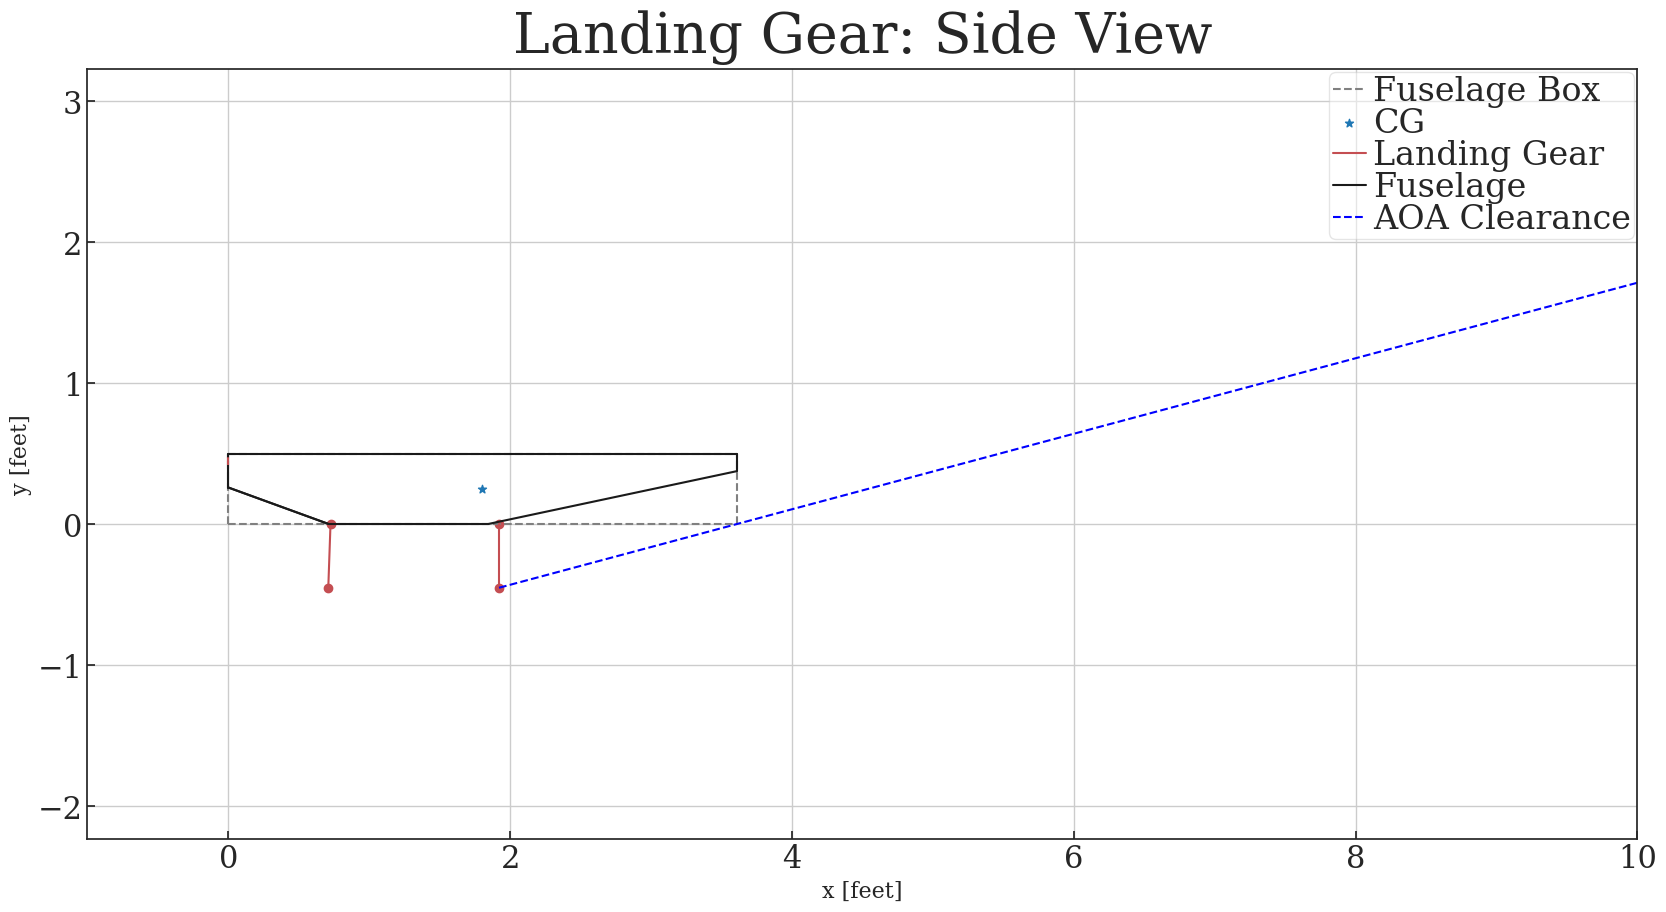

In [4]:
#Fuselage Characteristics!
Fuselage_len = 3.609  #feet
Fuselage_height = 0.5  #feet
Fuselage_width = 0.5 #feet 
CG = 1.8 #feet, measured from nose 

#Landing Gear Inputs! 
Tipback_angle = 15    #degrees
AOA_TO = 15   #degree
MTOW = 6    #lbs
NLG_W_percent = 0.10  
NLG_strut_travel= 2     #degree  
Overturn_angle = 60    #degree    #ideally between 25-60   

#Fuselage angles 
nose_min_height = 1/12     #feet   
fwd_height = .24075      #feet
fwd_angle = 70    #degree   #front angle
aft_angle = 12    #degrees    #back angle 
#tail_angle = 25    #degrees  
start_bot_angle_length = 1.843   #feet    #where you want the angle to start   

deg2rad = np.pi/180


#################################################################################################################
#Side Profile of Fuselage Main Shape (no cuts)
Fuselage_len_point= np.linspace(0,Fuselage_len,20)
Fuselage_height_point = np.linspace(0,Fuselage_height,20)

Fuselage_top = np.full(20,Fuselage_height)
Fuselage_bot = np.full(20,0)
Fuselage_front = np.full(20,0)
Fuselage_aft = np.full(20,Fuselage_len)


plt.figure(figsize = (20,10))
plt.grid(True)
plt.plot(Fuselage_len_point,Fuselage_top,color = 'grey',linestyle='--',label = 'Fuselage Box')
plt.plot(Fuselage_len_point,Fuselage_bot,color = 'grey',linestyle='--')
plt.plot(Fuselage_front,Fuselage_height_point,color = 'grey',linestyle='--')
plt.plot(Fuselage_aft,Fuselage_height_point,color = 'grey',linestyle='--')
plt.scatter(CG, (Fuselage_height/2), marker='*', label = "CG")



#################################################################################################################
#Landing Gear Placement 

LG_height = (np.tan(AOA_TO*deg2rad)*(Fuselage_len-CG))/(1+(np.tan(AOA_TO*deg2rad)*np.tan(Tipback_angle*deg2rad)))   #for both MLG and NLG

MLG_aft = np.tan(Tipback_angle*deg2rad)*LG_height   #aft from CG

NLG_fwd_wheel= MLG_aft*((MTOW-MTOW*NLG_W_percent)/(MTOW*NLG_W_percent))   #Fwd from CG wheel location

NLG_fwd_strut= NLG_fwd_wheel - (LG_height*np.tan(NLG_strut_travel*deg2rad))    #Fwd from CG to strut location 

LG_height_point = np.linspace(-LG_height,0,20)
MLG_aft_points = np.full(20,(MLG_aft+CG))

NLG_slope = (LG_height)/(NLG_fwd_wheel-NLG_fwd_strut)
NLG_b = -NLG_slope*(CG-NLG_fwd_strut)
NLG_aft_points = np.array([])

for i in range(20):
    NLG_aft_point = (LG_height_point[i]-NLG_b)/NLG_slope
    NLG_aft_points = np.append(NLG_aft_points,[NLG_aft_point])

LG_imp_points_x = [(CG-NLG_fwd_strut),(CG-NLG_fwd_wheel),(CG+MLG_aft),(CG+MLG_aft)]
LG_imp_points_y = [0,-LG_height,0,-LG_height]


plt.plot(MLG_aft_points,LG_height_point,color = 'r',linestyle='-', label = 'Landing Gear')
plt.plot(NLG_aft_points,LG_height_point,color = 'r', linestyle = '-')
plt.scatter(LG_imp_points_x,LG_imp_points_y,color = 'r', marker= 'o')
plt.axis('equal')

#####################################################################################################################
#Side Profile of Fuselage Ideal Shape (no cuts)
#front fwd fuslage section
Fuselage_height_fwd_point_min = np.linspace((Fuselage_height-nose_min_height),Fuselage_height,20)
Fuselage_height_fwd_point = np.linspace((Fuselage_height-fwd_height),Fuselage_height,20)

#fwd angled fuselage section
Fuselage_vert_points_angles = np.linspace(0,(Fuselage_height-fwd_height),20)
Fuselage_hori_points_angles = np.array([])
fwd_angle = fwd_angle+90
hori_point_extra= Fuselage_vert_points_angles[19]/(np.tan(fwd_angle*deg2rad))

for i in range(20):
    hori_point = Fuselage_vert_points_angles[i]/(np.tan(fwd_angle*deg2rad))-hori_point_extra
    Fuselage_hori_points_angles = np.append(Fuselage_hori_points_angles,[hori_point])

#bottom fuselage section 
Fuselage_bot_hori_points = np.linspace((Fuselage_hori_points_angles[0]),start_bot_angle_length,20)


#aft angled fuselage section 
Fuselage_vert_points_aft_angles = np.array([])
Fuselage_hori_points_aft_angles = np.linspace(start_bot_angle_length,Fuselage_len,20)
aft_angle = aft_angle*-1

for i in range(20):
    vert_point = (start_bot_angle_length-Fuselage_hori_points_aft_angles[i])*(np.tan(aft_angle*deg2rad))
    Fuselage_vert_points_aft_angles = np.append(Fuselage_vert_points_aft_angles,[vert_point])

#back aft fuselage section
Fuselage_aft_vert_points = np.linspace(Fuselage_vert_points_aft_angles[19],Fuselage_height,20)


#tail section
# tail_hori_points = np.linspace(Fuselage_len,Tail_len,20)
# tail_vert_points_top = np.array([])
# tail_vert_points_bot = np.array([])

# for i in range(20):
#     vert_point = (tail_hori_points[i]-Fuselage_len)*(np.tan(tail_angle*deg2rad))
#     tail_vert_points_bot = np.append(tail_vert_points_bot,[vert_point+Fuselage_vert_points_aft_angles[19]])
#     tail_vert_points_top = np.append(tail_vert_points_top,[vert_point+Fuselage_height])

# tail_back_x = np.full(20,Tail_len)
# tail_back_y = np.linspace(tail_vert_points_bot[19],tail_vert_points_top[19],20)

# plt.plot(tail_back_x, tail_back_y, color ='k', linestyle ='-')
# plt.plot(tail_hori_points,tail_vert_points_bot,color = 'k', linestyle ='-')
# plt.plot(tail_hori_points, tail_vert_points_top, color = 'k', linestyle = '-' )
plt.plot(Fuselage_front,Fuselage_height_fwd_point,color = 'k', linestyle = '-')
plt.plot(Fuselage_front,Fuselage_height_fwd_point_min,color = 'r', linestyle = '--')
plt.plot(Fuselage_hori_points_angles,Fuselage_vert_points_angles,color = 'k', linestyle = '-')
plt.plot(Fuselage_bot_hori_points,Fuselage_bot,color = 'k',linestyle='-')
plt.plot(Fuselage_hori_points_angles,Fuselage_vert_points_angles,color = 'k', linestyle = '-')
plt.plot(Fuselage_hori_points_aft_angles,Fuselage_vert_points_aft_angles,color = 'k', linestyle = '-')
plt.plot(Fuselage_aft,Fuselage_aft_vert_points, color = 'k', linestyle = '-')
plt.plot(Fuselage_len_point,Fuselage_top,color = 'k',linestyle='-',label = 'Fuselage')

###################################################################################################################################
#AOA clearance visual 
AOA_clearance_vert_points = np.array([])
AOA_clearance_hori_points = np.linspace((CG+MLG_aft),10,20)

vert_point_extra= (-(CG+MLG_aft)+AOA_clearance_hori_points[0])/(np.tan(fwd_angle*deg2rad))

for i in range(20):
    vert_point = (-(CG+MLG_aft)+AOA_clearance_hori_points[i])*(np.tan(AOA_TO*deg2rad)) - vert_point_extra - LG_height
    AOA_clearance_vert_points = np.append(AOA_clearance_vert_points,[vert_point])


plt.plot(AOA_clearance_hori_points,AOA_clearance_vert_points,color = 'blue', linestyle = '--', label = 'AOA Clearance')


plt.xlabel('x [feet]', fontsize=16)
plt.ylabel('y [feet]', fontsize=16)
plt.xlim(-1,10)
plt.ylim(-1,2)
plt.legend(loc='best')
plt.title('Landing Gear: Side View', fontsize = 40)
plt.show()



0.5976167481520253


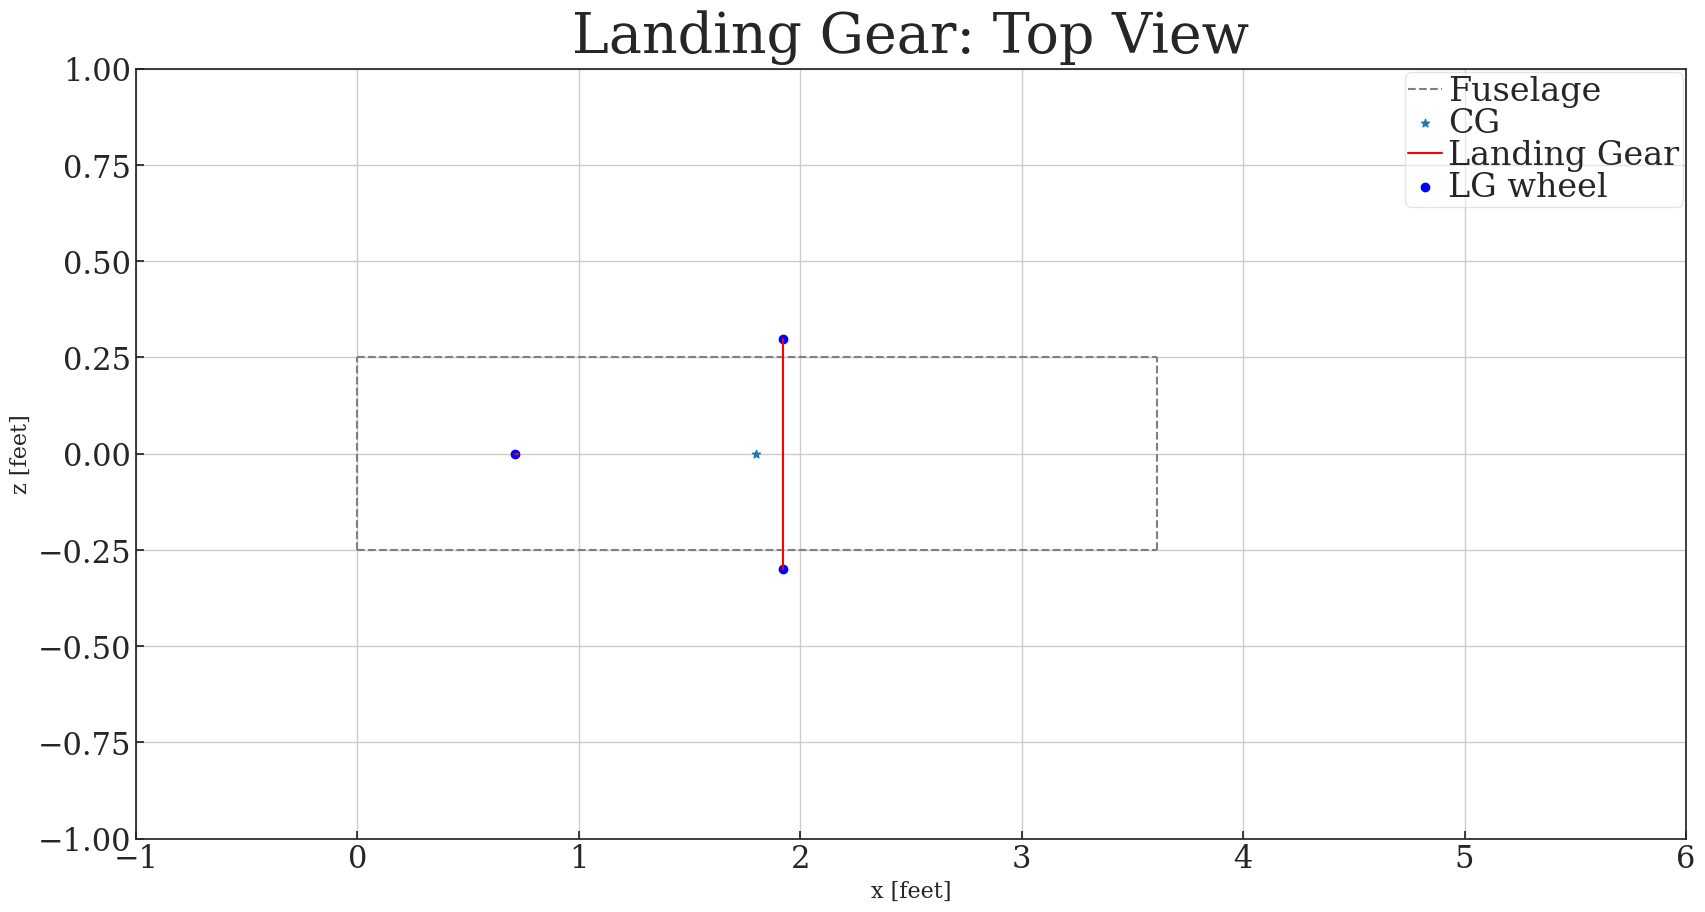

In [5]:

#####################################################################################################
#Fuselage shape 
Fuselage_wid_points = np.linspace((-Fuselage_width/2),(Fuselage_width/2),20)

Fuselage_right = np.full(20,(Fuselage_width/2))
Fuselage_left = np.full(20,(-Fuselage_width/2))


plt.figure(figsize = (20,10))
plt.grid(True)
plt.plot(Fuselage_front,Fuselage_wid_points,color = 'grey',linestyle='--')
plt.plot(Fuselage_aft,Fuselage_wid_points,color = 'grey',linestyle='--')
plt.plot(Fuselage_len_point,Fuselage_right,color = 'grey',linestyle='--')
plt.plot(Fuselage_len_point,Fuselage_left,color = 'grey',linestyle='--', label = 'Fuselage')
plt.scatter(CG, 0, marker='*', label = "CG")


#######################################################################################################
#Landing Gear Placement 


LG_imp_points_x = [(CG-NLG_fwd_strut),(CG-NLG_fwd_wheel),(CG+MLG_aft),(CG+MLG_aft)]
LG_imp_points_y = [0,0,0,-LG_height]


MLG_side = (NLG_fwd_wheel+MLG_aft)*np.tan((np.arcsin(((LG_height/np.tan(Overturn_angle*deg2rad))/NLG_fwd_wheel))))

print(MLG_side*2)

MLG_side_points_y = np.linspace(-MLG_side,MLG_side,20)
MLG_side_points_x = np.full(20,(CG+MLG_aft))

NLG_top_view_points_x = np.linspace((CG - NLG_fwd_wheel),(CG - NLG_fwd_strut),20)
NLG_top_view_points_z = np.full(20,0)

LG_wheel_x = [(CG - NLG_fwd_wheel),(CG+MLG_aft),(CG+MLG_aft)]
LG_wheel_z = [(0),(-MLG_side), MLG_side]

plt.plot(NLG_top_view_points_x,NLG_top_view_points_z, color ='red',linestyle ='-')
plt.plot(MLG_side_points_x,MLG_side_points_y,color= 'red', linestyle = '-', label = 'Landing Gear')
plt.scatter(LG_wheel_x,LG_wheel_z, color = "blue", marker ='o', label = "LG wheel")

plt.xlabel('x [feet]', fontsize=16)
plt.ylabel('z [feet]', fontsize=16)
plt.xlim(-1,6)
plt.ylim(-1,1)
plt.title('Landing Gear: Top View', fontsize = 40)
plt.legend(loc='best')
plt.show()

In [6]:
x = [CG+MLG_aft, CG+MLG_aft, CG - NLG_fwd_wheel, CG - NLG_fwd_strut]
y = [MLG_side, -MLG_side, 0, 0]
z = [LG_height, LG_height, LG_height, 0]

title = 'Landing Gear Placement Results (in feet)'
print('-' * len(title))
print(title)
print('-' * len(title))
print('x - Distance from nose, positive towards tail')
print('y - Distance from plane of symmetry, positive out right wing')
print('z - Distance from bottom of fuselage, positive upwards\n')
print('{:<25} {:<10} {:<10} {:<10}'.format('Component', 'x', 'y', 'z'))
print('-' * 58)
for i, comp in enumerate(['MLG Right Wheel', 'MLG Left Wheel', 'NLG Wheel', 'NLG Strut connection']):
    print('{:<25} {:< 10.4f} {:< 10.4f} {:< 10.4f}'.format(comp, x[i], y[i], z[i]))

----------------------------------------
Landing Gear Placement Results (in feet)
----------------------------------------
x - Distance from nose, positive towards tail
y - Distance from plane of symmetry, positive out right wing
z - Distance from bottom of fuselage, positive upwards

Component                 x          y          z         
----------------------------------------------------------
MLG Right Wheel            1.9212     0.2988     0.4522   
MLG Left Wheel             1.9212    -0.2988     0.4522   
NLG Wheel                  0.7094     0.0000     0.4522   
NLG Strut connection       0.7252     0.0000     0.0000   
